In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sqlite3

In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


In [4]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -------------------------------- ------- 245.8/301.4 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:

## Read the dataset (csv file) from Kaggle
url = 'https://drive.google.com/file/d/1W4_6_Et46AUFy9kQoCsFv480Yg2_FVqK/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


In [7]:
# Get the statistics of all the columns and rows in the dataset
print("The total number of columns:", df.shape [1])
print("The total number of rows:", df.shape[0])
print(df.head(10))
print(df.describe(include=['object']))

The total number of columns: 25
The total number of rows: 40000
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   
5  2022-10-28 13:14:27     198.102.5.160        147.190.155.133        17430   
6  2022-05-16 17:55:43     97.253.103.59           77.16.101.53        26562   
7  2023-02-12 07:13:17      11.48.99.245         178.157.14.116        34489   
8  2023-06-27 11:02:56     49.32.208.167           72.202.237.9        56296   
9  2021-08-15 22:29:04   114.109.149.113         160.88.194.172        37918   

   Destination Port Protocol  Packet Length Packet Type

In [8]:
## Data Cleaning
# Checking for duplicates
duplicates = df.duplicated()

In [9]:
# Counting the total number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)
print("Rows with duplicates:")
print(df[duplicates])

Number of duplicates: 0
Rows with duplicates:
Empty DataFrame
Columns: [Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type, Traffic Type, Payload Data, Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, User Information, Device Information, Network Segment, Geo-location Data, Proxy Information, Firewall Logs, IDS/IPS Alerts, Log Source]
Index: []

[0 rows x 25 columns]


In [10]:
# Checking the datatype of each column
for column_name in df.columns:
     data_type = df[column_name].dtype
     is_categorical = isinstance(data_type, pd.CategoricalDtype)
     is_numeric = pd.api.types.is_numeric_dtype(data_type)
     print(f"column '{column_name}' - Data Type: {data_type}, Categorical: {is_categorical}, Numeric: {is_numeric}")


column 'Timestamp' - Data Type: object, Categorical: False, Numeric: False
column 'Source IP Address' - Data Type: object, Categorical: False, Numeric: False
column 'Destination IP Address' - Data Type: object, Categorical: False, Numeric: False
column 'Source Port' - Data Type: int64, Categorical: False, Numeric: True
column 'Destination Port' - Data Type: int64, Categorical: False, Numeric: True
column 'Protocol' - Data Type: object, Categorical: False, Numeric: False
column 'Packet Length' - Data Type: int64, Categorical: False, Numeric: True
column 'Packet Type' - Data Type: object, Categorical: False, Numeric: False
column 'Traffic Type' - Data Type: object, Categorical: False, Numeric: False
column 'Payload Data' - Data Type: object, Categorical: False, Numeric: False
column 'Malware Indicators' - Data Type: object, Categorical: False, Numeric: False
column 'Anomaly Scores' - Data Type: float64, Categorical: False, Numeric: True
column 'Alerts/Warnings' - Data Type: object, Categ

In [11]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values count for each column:", missing_values)

Missing values count for each column: Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [12]:
# Checking the datatype of each column
for column_name in df .columns:
    data_type = df[column_name].dtype
    is_categorical = isinstance(data_type, pd.CategoricalDtype)
    is_numerical = pd.api.types.is_numeric_dtype(data_type)
    print (f"Column '{column_name}' Data Type: {data_type}, Categorical: {is_categorical}, Numeric: {is_numeric}")


Column 'Timestamp' Data Type: object, Categorical: False, Numeric: False
Column 'Source IP Address' Data Type: object, Categorical: False, Numeric: False
Column 'Destination IP Address' Data Type: object, Categorical: False, Numeric: False
Column 'Source Port' Data Type: int64, Categorical: False, Numeric: False
Column 'Destination Port' Data Type: int64, Categorical: False, Numeric: False
Column 'Protocol' Data Type: object, Categorical: False, Numeric: False
Column 'Packet Length' Data Type: int64, Categorical: False, Numeric: False
Column 'Packet Type' Data Type: object, Categorical: False, Numeric: False
Column 'Traffic Type' Data Type: object, Categorical: False, Numeric: False
Column 'Payload Data' Data Type: object, Categorical: False, Numeric: False
Column 'Malware Indicators' Data Type: object, Categorical: False, Numeric: False
Column 'Anomaly Scores' Data Type: float64, Categorical: False, Numeric: False
Column 'Alerts/Warnings' Data Type: object, Categorical: False, Numeric

In [13]:
# Inputting the missing values with mode
df['Malware Indicators'] = df['Malware Indicators'].fillna(df['Malware Indicators'].mode()[0])
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna(df['Alerts/Warnings'] .mode()[0])
df['Proxy Information'] = df['Proxy Information'].fillna(df['Proxy Information'].mode()[0])
df['Firewall Logs'] = df['Firewall Logs'].fillna(df['Firewall Logs'].mode()[0])
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna(df['IDS/IPS Alerts']. mode()[0])


In [14]:
# Drop Payload column (irrelevant)
df = df.drop(labels='Payload Data', axis=1)

# Drop column if it has more than 90% of its data missing
df_cleaned = df.dropna(thresh=len(df) * 0.1, axis=1)

In [15]:
#### VISUALISATIONS ####
# Visualisation: Word Cloud
columns = ['Attack Type', 'Malware Indicators', 'Firewall Logs', 'Log Source', 'Geo-location Data']

#obtain the data from the selected column
data = df[columns]

In [16]:
#Convert the data to a string format
text = " ".join(str(value) for column in data.columns for value in data[column])

In [17]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

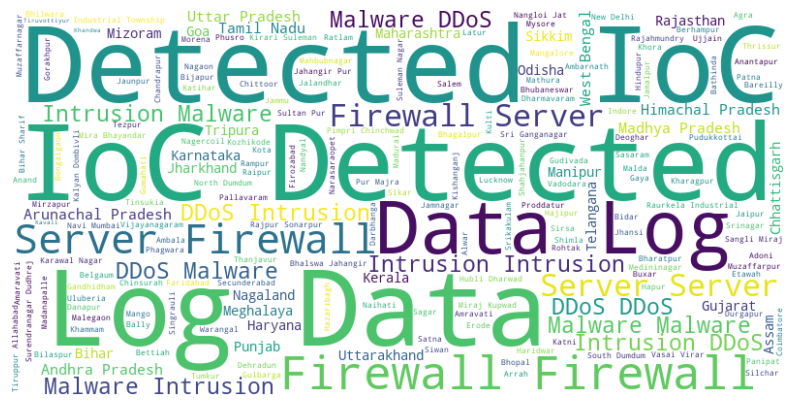

In [18]:
# Display the word cloud
plt. figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Visualisation: Attack Analysis
attack_type_counts = df['Attack Type'].value_counts()
print("Distribution of Attack Types:", attack_type_counts)


Distribution of Attack Types: Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [20]:
# Obtain data for the pie chart
sizes = df['Attack Type'].value_counts()

In [21]:
# Setting custom colours and explode parameter
custom_colours = sns.color_palette('Accent')
explode = [0] * (len(attack_type_counts) - 1) + [0.1]

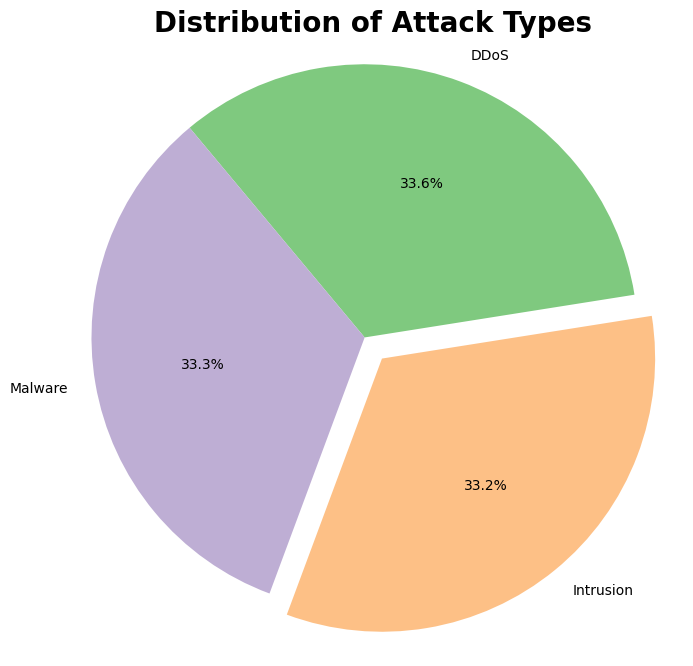

In [22]:
# Plotting the different distributions of the attack analysis in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_type_counts, labels=attack_type_counts.index, autopct='%1.1f%%', startangle=9, colors=custom_colours, explode= explode)
plt. title(label='Distribution of Attack Types', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.show()

In [23]:
# Visualisation: Plotting a point plot- Severity levels of the attack in a line chart
# Obtain the counts of the Dataframe to avoid modifying the original
severity_level_counts = df["Severity Level"].value_counts()
print("\nDistribution of Severity Levels:", severity_level_counts)


Distribution of Severity Levels: Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


In [24]:
# Create a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()
# encoding the categorical variables into numerical values
df_copy["Severity Level"] = pd.factorize(df["Severity Level"])[0]

C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\1217718794.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Attack Type", loc="upper right")


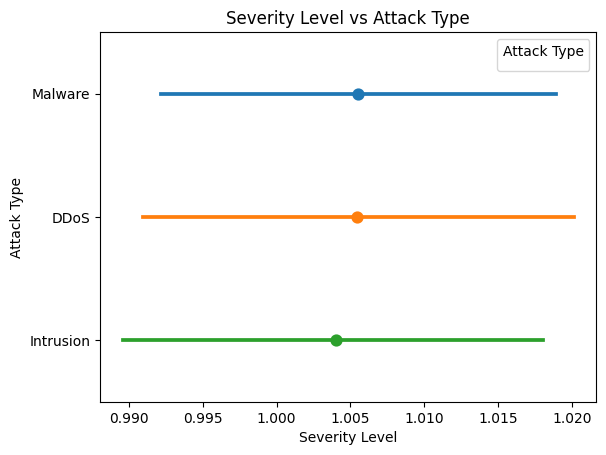

In [25]:
# Creating point plots for the severity levels
sns.pointplot(data=df_copy, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()


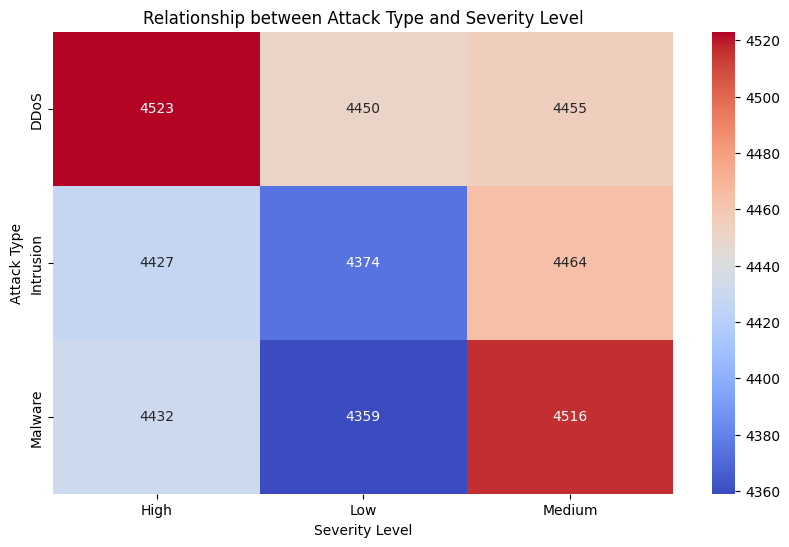

In [26]:
# Visualisation: Heatmap
# Analysing the relationship between the Attack Type and Severity level
# Creating a cross-tabulation of Attack Type and Severity Level
cross_tab = pd.crosstab(df['Attack Type'], df[ 'Severity Level'])

# Plotting a heatmap
plt. figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Attack Type and Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Attack Type')
plt.show()

In [27]:
# Visualisation: Line Chart
# Performing Temporal Analysis to identify attack Patterns over time
# Converting the Timestamp column to Pandas datetime series.
df['Timestamp'] = pd. to_datetime(df['Timestamp'])
# Resample the data by month and count the number of attacks per month
monthly_attacks = df.resample(rule='M', on='Timestamp')['Attack Type'].count()

C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\1103690150.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_attacks = df.resample(rule='M', on='Timestamp')['Attack Type'].count()


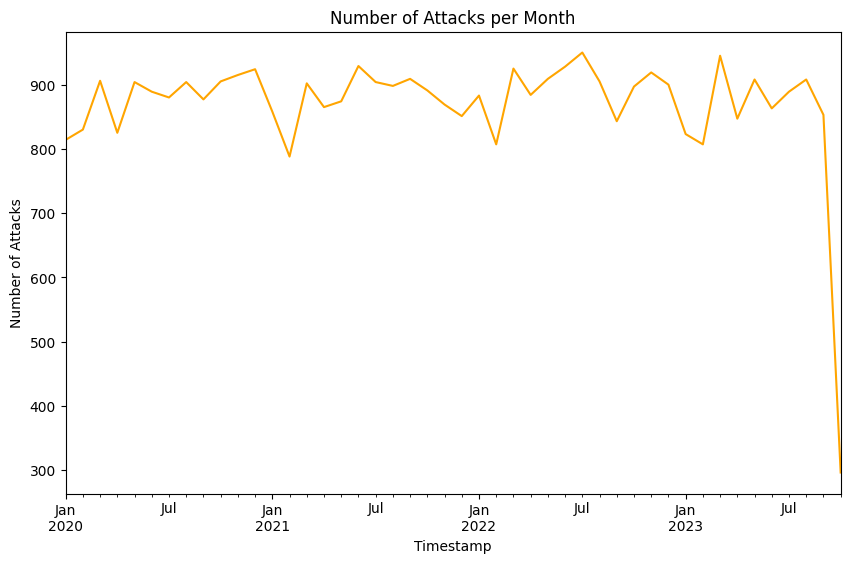

In [28]:
# Plot the number of attacks by month
monthly_attacks.plot(color='orange', figsize=(10, 6))
plt.title('Number of Attacks per Month')
plt.ylabel('Number of Attacks')
plt.show()



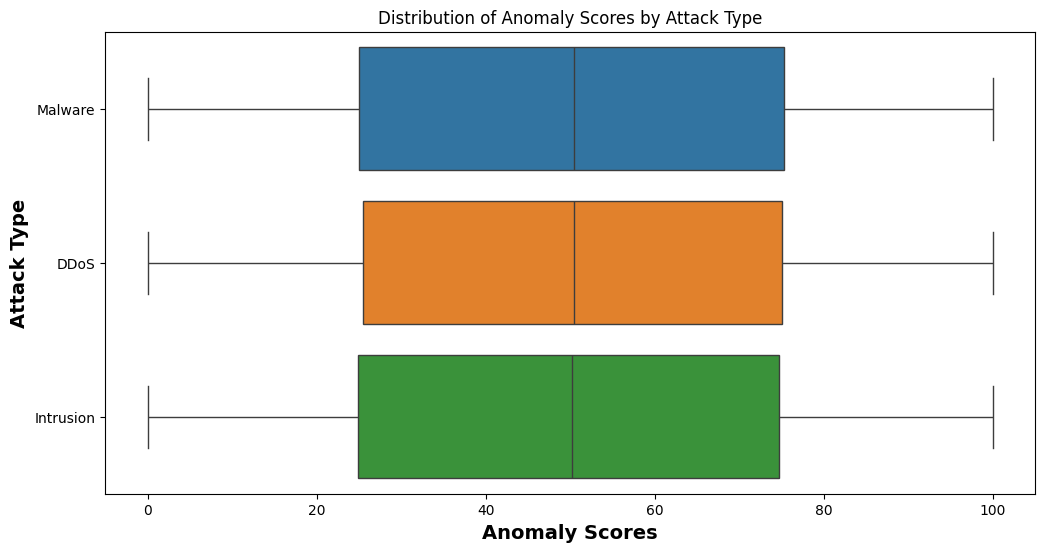

In [29]:
# Visualisation: Box Plot
# Anomaly Scores on Attack Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Anomaly Scores', y='Attack Type', hue='Attack Type', showfliers=False)
plt. title(f'Distribution of Anomaly Scores by Attack Type')
plt.xlabel(xlabel='Anomaly Scores', fontsize=14, fontweight='bold')
plt.ylabel(ylabel='Attack Type', fontsize=14, fontweight= 'bold')
plt.show()

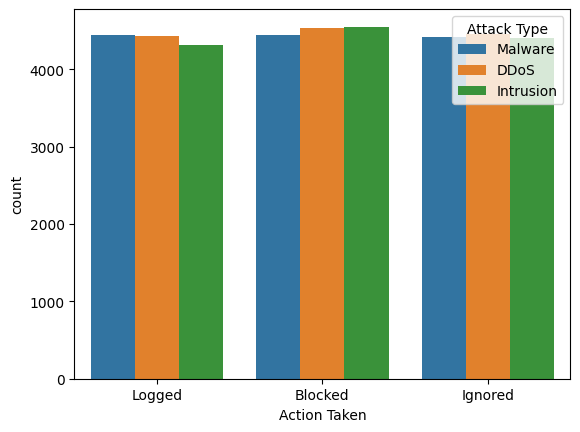

In [30]:
# Visualisation: Count Plot
# Countplot Attack Type & Action Taken import
sns.countplot(data=df, x='Action Taken', hue='Attack Type')
plt.show()


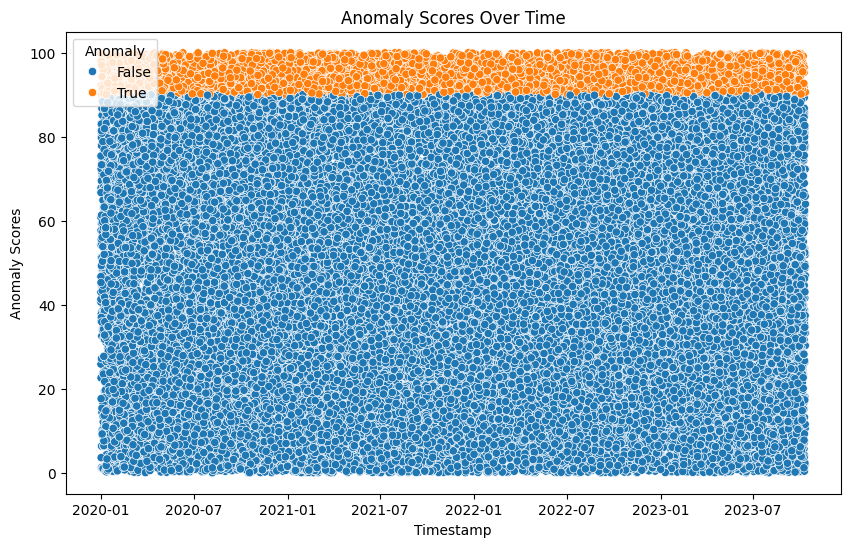

In [31]:
# Visualisation: Scatter Plot
# Incident Response Analysis
threshold = 90
df['Anomaly'] = df['Anomaly Scores'] > threshold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Timestamp', y='Anomaly Scores', hue='Anomaly')
plt.title('Anomaly Scores Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Scores')
plt.show()


In [32]:
# Visualisation: Horizontal Bar chart - users according to Alert count
# Check for unique actions + categorizing to identify suspicious ones
print('Columns from Action Taken:', df['Action Taken'].unique())
# Filtering out suspicious activities
suspicious_df = df[df['Action Taken'].isin(['Blocked', 'Alerted'])]

Columns from Action Taken: ['Logged' 'Blocked' 'Ignored']


In [33]:

# Grouping the data by 'User Information' to count the number of alerts per user
user_alert_counts = df.groupby('User Information').size()

# Find the people with highest alert count
max_alert_count = user_alert_counts.max()


In [34]:
# Output the results of finding the people with highest alert count
print(f"The highest alert count for any user is: {max_alert_count}")


The highest alert count for any user is: 6


User(s) with the highest alert count:
User Information
Heer Lad            6
Ishaan Chaudhari    6
dtype: int64


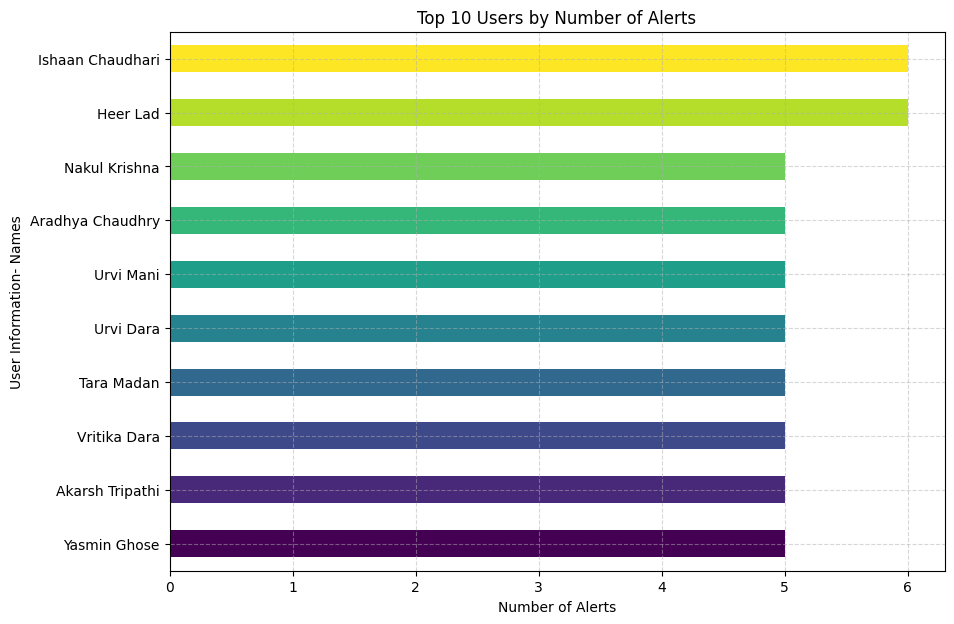

In [35]:
# finding the user(s) with this highest count
users_with_max_alerts = user_alert_counts[user_alert_counts == max_alert_count]
print("User(s) with the highest alert count:")
print(users_with_max_alerts)

# Sort the alert counts in descending order and getting the top 10
top_user_alert_counts = user_alert_counts.sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_user_alert_counts)))  # Generate a color gradient for the bars
top_user_alert_counts.sort_values().plot(kind='barh', color=colors)  # Plot as a horizontal bar chart
plt.xlabel('Number of Alerts')
plt.ylabel('User Information- Names')
plt.title('Top 10 Users by Number of Alerts')
plt.grid(True, linestyle='--', alpha=0.5)  # Add light grid lines for better readability
plt.show()


In [36]:
# Visualisation: Horizontal bar chart showing laptops with the highest number of alert count according to device model
# Count the occurrences of each device in the alerts
device_alert_counts = df.groupby('Device Information').size()

In [37]:
# Sort the alert counts in descending order and get the top devices
top_device_alert_counts = device_alert_counts.sort_values(ascending=False).head(10)

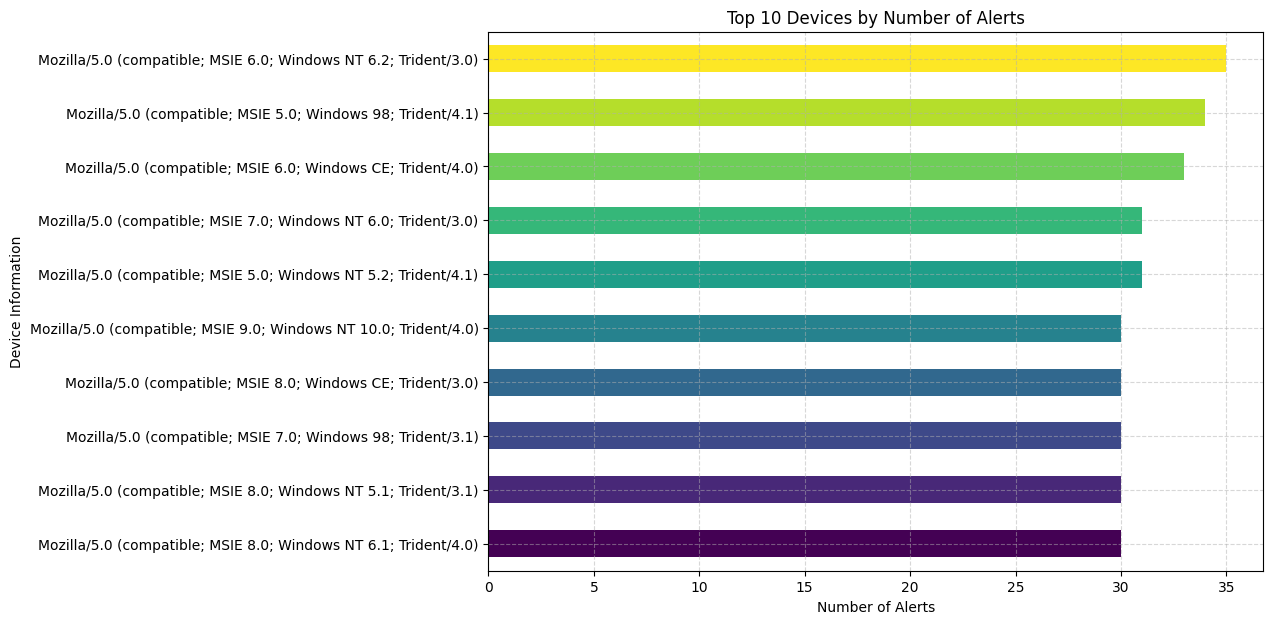

In [38]:
# Plotting the data
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_device_alert_counts)))  # Generate a color gradient for the bars
top_device_alert_counts.sort_values().plot(kind='barh', color=colors)
plt.xlabel('Number of Alerts')
plt.ylabel('Device Information')
plt.title('Top 10 Devices by Number of Alerts')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\3430328885.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  alerts_over_time = df.resample('M', on="Timestamp")["Attack Type"].value_counts().unstack(fill_value=0)


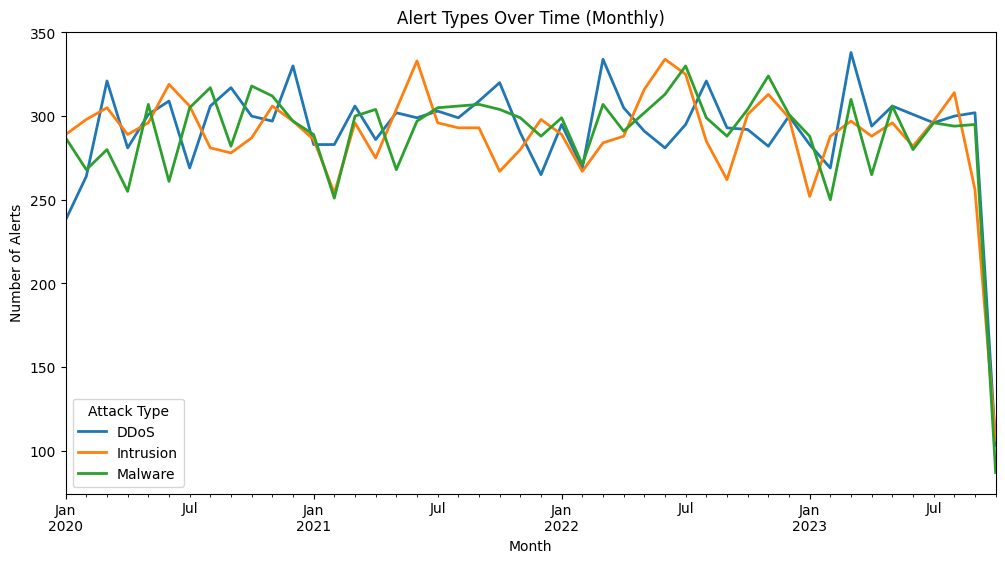

In [39]:
# Visualisation: Line Plot
# Resample data to get the monthly count of alerts/warnings for each attack type
alerts_over_time = df.resample('M', on="Timestamp")["Attack Type"].value_counts().unstack(fill_value=0)

# Create a line plot for each attack type with monthly resampling
alerts_over_time.plot(kind='line', figsize=(12, 6), lw=2)

plt.xlabel("Month")
plt.ylabel("Number of Alerts")
plt.title("Alert Types Over Time (Monthly)")
plt.show()


<Axes: xlabel='Traffic Type'>

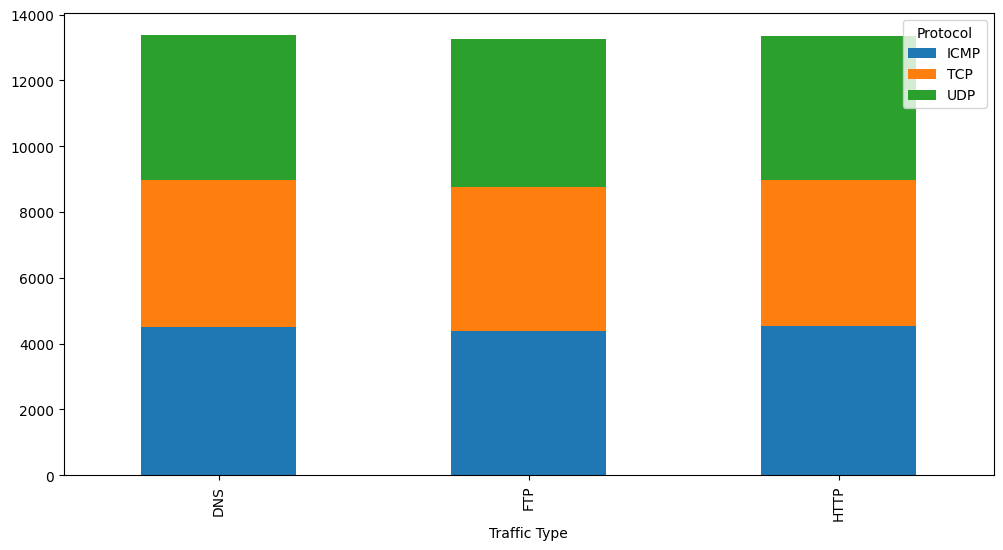

In [40]:
# Visualisation: Stacked Bar Plot
# Create a pivot table for traffic type and protocol
protocol_traffic_pivot = df.pivot_table(index="Traffic Type", columns="Protocol", aggfunc='count', values="Timestamp")

# Create a stacked bar plot
protocol_traffic_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))


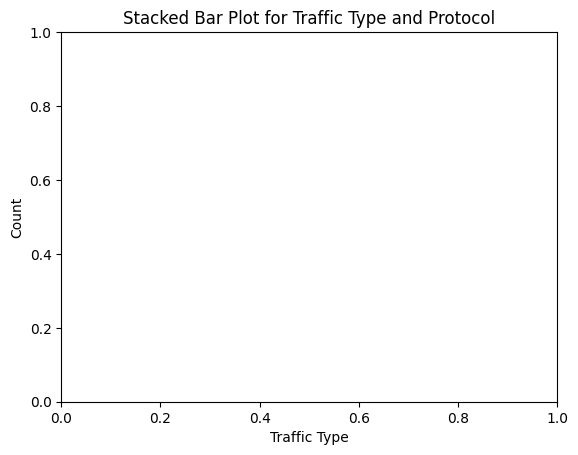

In [41]:
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.title("Stacked Bar Plot for Traffic Type and Protocol")
plt.show()


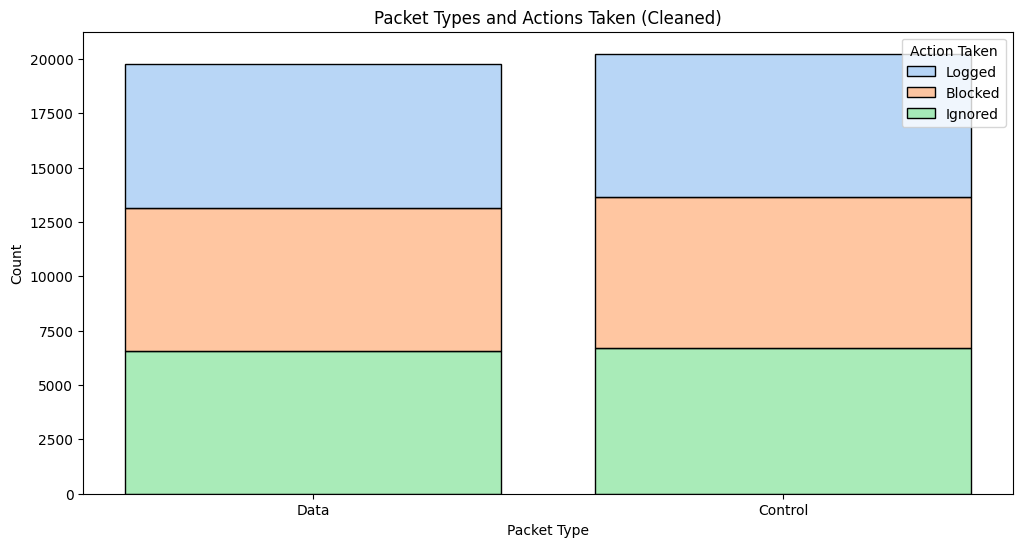

In [42]:
# Visualisation: Stacked Bar Plot
# Stacked bar plot for packet types and actions taken (without blanks)
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Packet Type', hue='Action Taken', multiple='stack', shrink=0.8, palette='pastel')
plt.title('Packet Types and Actions Taken (Cleaned)')
plt.xlabel('Packet Type')
plt.ylabel('Count')
plt.show()

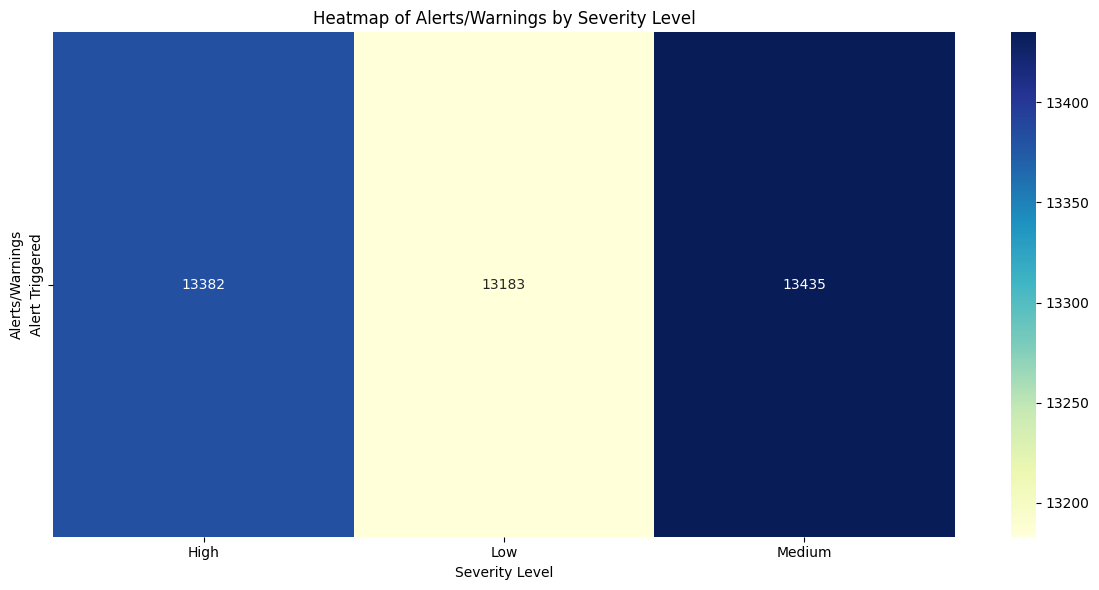

In [43]:
# Visualisation: HeatMap
# Create a crosstab for the heatmap
heatmap_data = pd.crosstab(df['Alerts/Warnings'], df['Severity Level'])

# Heatmap showing the relationship between Alerts/Warnings and Severity Level
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu')  # 'annot=True' to display values, 'fmt="d"' for integer format
plt.title('Heatmap of Alerts/Warnings by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Alerts/Warnings')

# Proper layout to avoid overlapping
plt.tight_layout()
plt.show()

C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\2466251077.py:50: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df_subset, alpha=0.2, ax=ax, diagonal='kde')


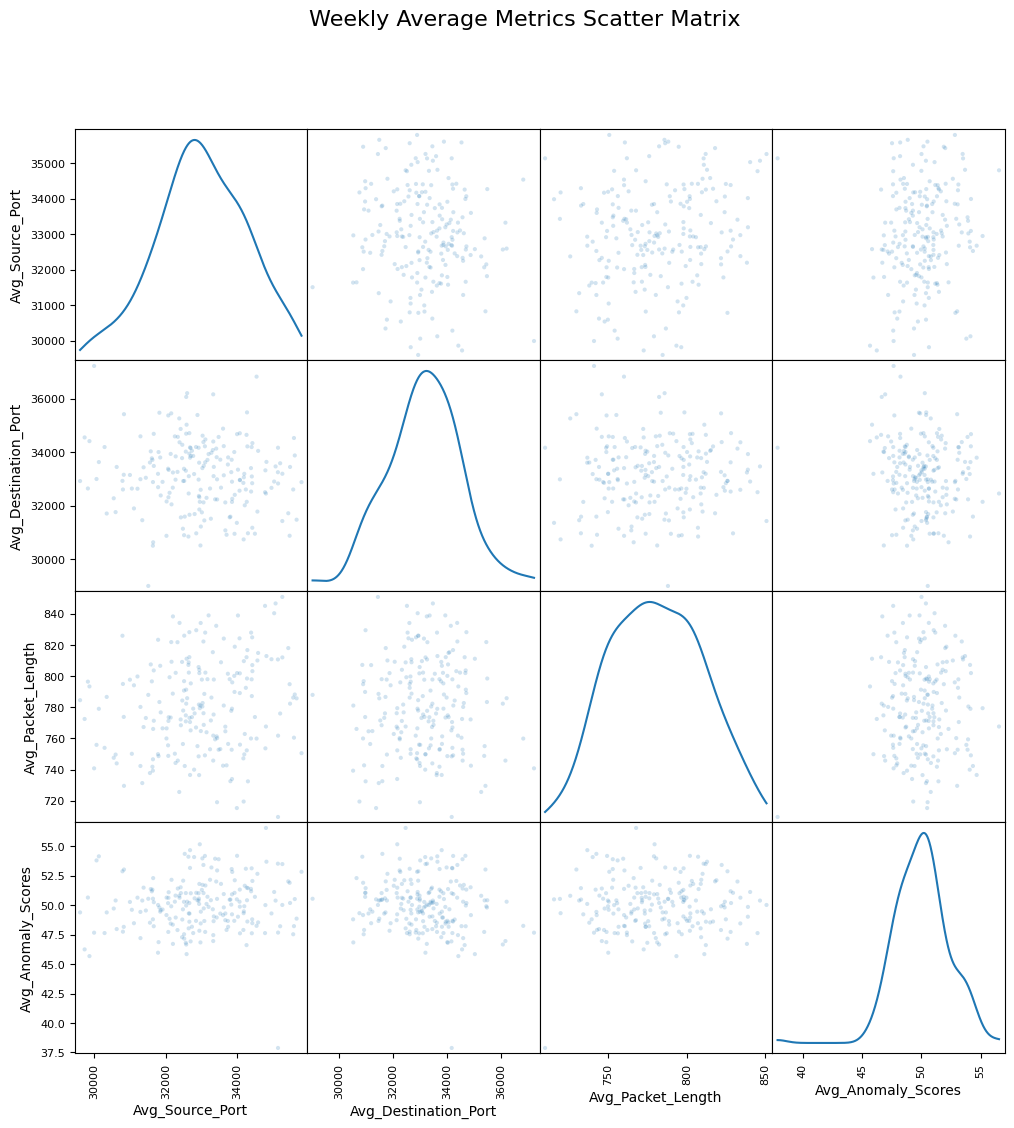

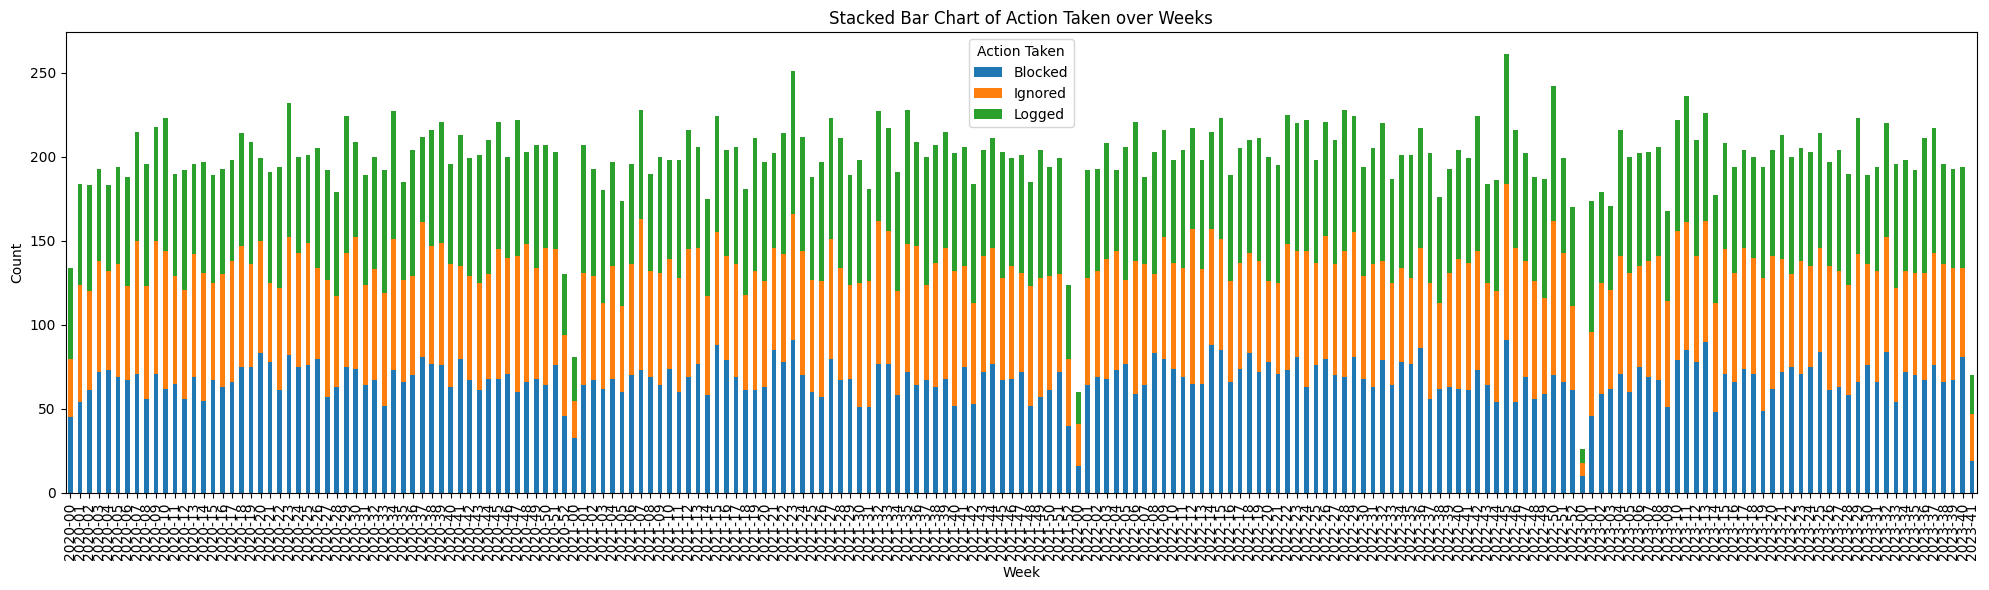

C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\2466251077.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[week_column] = pd.to_datetime(df[week_column] + '-0', format='%Y-%W-%w')


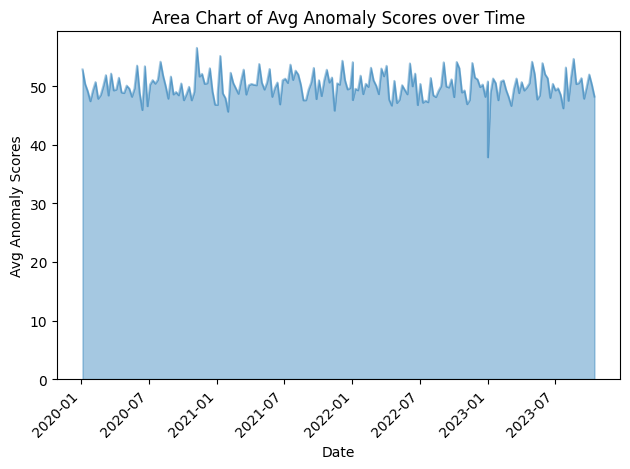

C:\Users\Junnubava\AppData\Local\Temp\ipykernel_11780\2466251077.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=category, y=avg_numeric, data=df, palette="muted", inner=None)  # Set inner=None to remove the bars inside the violins


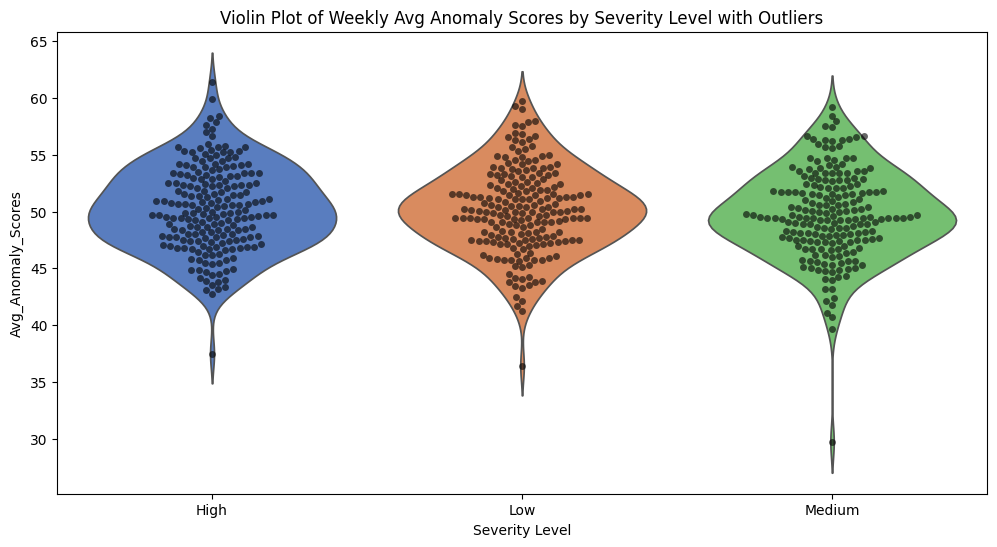

In [47]:
df = pd.read_csv(url)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Connect to the SQLite database and write the data
conn = sqlite3.connect('cybersecurity_attacks.db')
df.to_sql('attacks', conn, if_exists='replace', index=False)

# Query to calculate the weekly average for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
query_avg = "SELECT strftime('%Y-%W', Timestamp) as Week,"
query_avg += ", ".join([f"AVG(\"{col}\") as Avg_{col.replace(' ', '_')}" for col in numerical_columns])
query_avg += " FROM attacks GROUP BY Week ORDER BY Week;"
weekly_avg_df = pd.read_sql_query(query_avg, conn)

# Query to calculate the count of actions by attack type per week
query_counts = """
SELECT 
    strftime('%Y-%W', Timestamp) as Week,
    "Attack Type",
    "Action Taken",
    COUNT(*) as Count
FROM 
    attacks
GROUP BY 
    Week, "Attack Type", "Action Taken"
ORDER BY 
    Week, "Attack Type", "Action Taken";
"""
weekly_counts_df = pd.read_sql_query(query_counts, conn)

# Query to calculate the weekly average 'Anomaly Scores' for each 'Severity Level'
query_severity = """
SELECT 
    strftime('%Y-%W', Timestamp) as Week,
    "Severity Level",
    AVG("Anomaly Scores") as Avg_Anomaly_Scores
FROM 
    attacks
GROUP BY 
    Week, "Severity Level";
"""
weekly_severity_avg_df = pd.read_sql_query(query_severity, conn)

# Close the SQLite connection
conn.close()

# Plotting functions
def plot_scatter_matrix(df_subset, title):
    fig, ax = plt.subplots(figsize=(12, 12))  # Create a figure and a grid of subplots
    pd.plotting.scatter_matrix(df_subset, alpha=0.2, ax=ax, diagonal='kde')
    fig.suptitle(title, fontsize=16)  # Add a main title to the figure

def plot_stacked_bar(df, week_column, sub_category):
    pivot_table = df.pivot_table(index=week_column, columns=sub_category, values='Count', aggfunc='sum', fill_value=0)
    pivot_table.plot(kind='bar', stacked=True, figsize=(20, 6))
    plt.title(f'Stacked Bar Chart of {sub_category} over Weeks')
    plt.ylabel('Count')
    plt.xlabel('Week')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_violin(df, category, avg_numeric):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=category, y=avg_numeric, data=df, palette="muted", inner=None)  # Set inner=None to remove the bars inside the violins
    sns.swarmplot(x=category, y=avg_numeric, data=df, color='k', alpha=0.6)  # Add a swarmplot to show individual points
    avg_numeric = avg_numeric.replace('_', ' ')
    plt.title(f'Violin Plot of Weekly {avg_numeric} by {category} with Outliers')
    plt.show()


def plot_area_chart(df, week_column, avg_column):
    df[week_column] = pd.to_datetime(df[week_column] + '-0', format='%Y-%W-%w')
    df.set_index(week_column, inplace=True)
    df[avg_column].plot.area(alpha=0.4)
    avg_column = avg_column.replace('_', ' ')
    plt.title(f'Area Chart of {avg_column} over Time')
    plt.ylabel(avg_column)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call plotting functions
plot_scatter_matrix(weekly_avg_df.drop('Week', axis=1), "Weekly Average Metrics Scatter Matrix")
plot_stacked_bar(weekly_counts_df, 'Week', 'Action Taken')
plot_area_chart(weekly_avg_df[['Week', 'Avg_Anomaly_Scores']], 'Week', 'Avg_Anomaly_Scores')
# Ensure the 'Avg_Anomaly_Scores' column is of type float for the violin plot
weekly_severity_avg_df['Avg_Anomaly_Scores'] = weekly_severity_avg_df['Avg_Anomaly_Scores'].astype(float)
# Call the plotting function for the aggregated weekly average data
plot_violin(weekly_severity_avg_df, 'Severity Level', 'Avg_Anomaly_Scores')